In [7]:
import alara_output_processing as aop
import matplotlib.pyplot as plt

In [8]:
fp = '/filespace/a/asrajendra/research/activationDB/iter'
pulse_list = [2, 4, 8, 32, 64]
duty_cycles = [100, 90, 50, 25]

In [9]:
runs_100 = {
    "run1_100" : f"{fp}/duty_cycle_100/output_100/iter_dt_ss_2p_out",
    "run2_100" : f"{fp}/duty_cycle_100/output_100/iter_dt_ss_4p_out",
    "run3_100" : f"{fp}/duty_cycle_100/output_100/iter_dt_ss_8p_out",
    "run4_100" : f"{fp}/duty_cycle_100/output_100/iter_dt_ss_32p_out",
    "run5_100" : f"{fp}/duty_cycle_100/output_100/iter_dt_ss_64p_out",
}

runs_90 = {
    "run1_90" : f"{fp}/duty_cycle_90/output_90/iter_dt_2p_90_out",
    "run2_90" : f"{fp}/duty_cycle_90/output_90/iter_dt_4p_90_out",
    "run3_90" : f"{fp}/duty_cycle_90/output_90/iter_dt_8p_90_out",
    "run4_90" : f"{fp}/duty_cycle_90/output_90/iter_dt_32p_90_out",
    "run5_90" : f"{fp}/duty_cycle_90/output_90/iter_dt_64p_90_out",
}

runs_50 = {
    "run1_50" : f"{fp}/duty_cycle_50/output_50/iter_dt_2p_50_out",
    "run2_50" : f"{fp}/duty_cycle_50/output_50/iter_dt_4p_50_out",
    "run3_50" : f"{fp}/duty_cycle_50/output_50/iter_dt_8p_50_out",
    "run4_50" : f"{fp}/duty_cycle_50/output_50/iter_dt_32p_50_out",
    "run5_50" : f"{fp}/duty_cycle_50/output_50/iter_dt_64p_50_out",
}

runs_25 = {
    "run1_25" : f"{fp}/duty_cycle_25/output_25/iter_dt_2p_25_out",
    "run2_25" : f"{fp}/duty_cycle_25/output_25/iter_dt_4p_25_out",
    "run3_25" : f"{fp}/duty_cycle_25/output_25/iter_dt_8p_25_out",
    "run4_25" : f"{fp}/duty_cycle_25/output_25/iter_dt_32p_25_out",
    "run5_25" : f"{fp}/duty_cycle_25/output_25/iter_dt_64p_25_out",
}
runs_list = [runs_100, runs_90, runs_50, runs_25]

In [10]:
datasets = []
for runs in runs_list:
    lib = aop.DataLibrary()
    adf = aop.DataLibrary.make_entries(lib, runs)
    #Be = Zone 1
    filtered_adf = adf.filter_rows(
        filter_dict={
            "variable" : adf.VARIABLE_ENUM["Number Density"],
            "nuclide"  : "total",
            "block" : adf.BLOCK_ENUM["Zone"],
            "block_num" : "1"
        }
    )
    values = []
    for value in filtered_adf['value']:
        values.append(value)
    datasets.append((pulse_list, values))

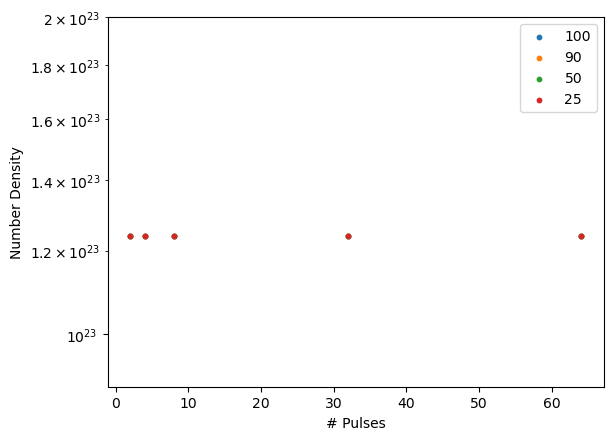

<Figure size 640x480 with 0 Axes>

In [11]:
for i, (pulse_list, num_dens) in enumerate(datasets):
    plt.scatter(pulse_list, num_dens, label=f'{duty_cycles[i]}', s=10)

plt.xlabel('# Pulses')
plt.ylabel('Number Density')
plt.yscale('log')
plt.ylim(top=2E+23)
#plt.title('')
plt.legend()
plt.show()
plt.savefig('ITER_DT.png')